In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("brainstroke.csv")

In [2]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [3]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [5]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.278120,0.264852,0.236763,0.373703,0.246478
hypertension,0.278120,1.000000,0.111974,0.170028,0.158762,0.131965
heart_disease,0.264852,0.111974,1.000000,0.166847,0.060926,0.134610
avg_glucose_level,0.236763,0.170028,0.166847,1.000000,0.186348,0.133227
bmi,0.373703,0.158762,0.060926,0.186348,1.000000,0.056926
stroke,0.246478,0.131965,0.134610,0.133227,0.056926,1.000000


<AxesSubplot:>

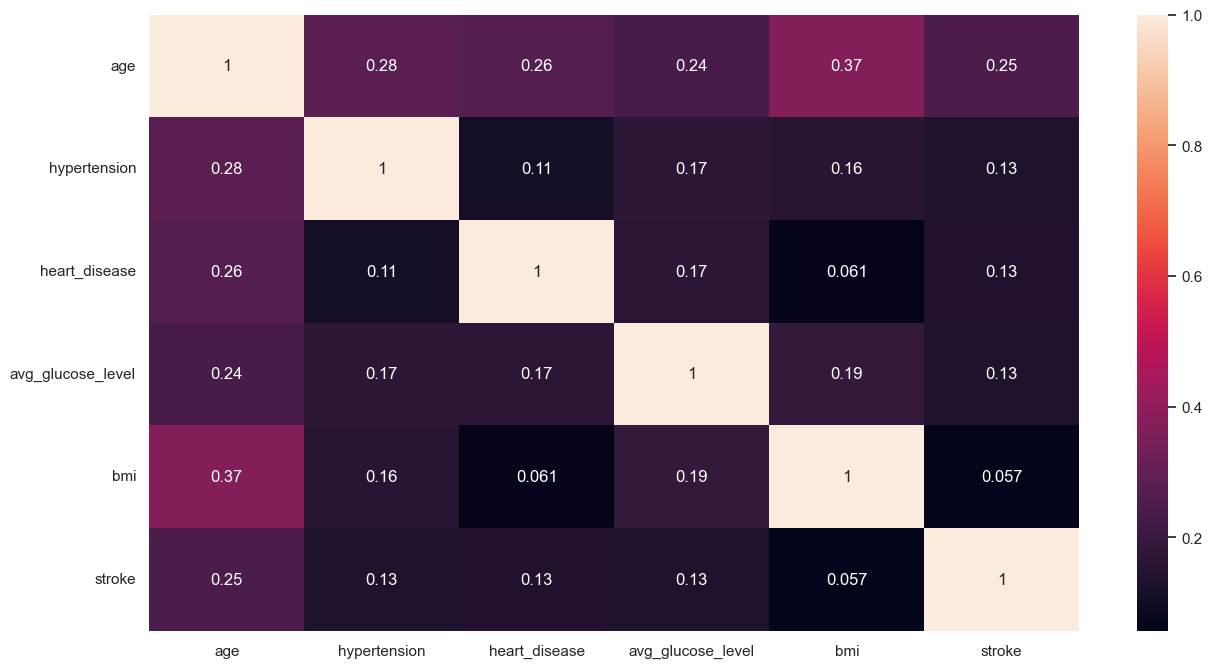

In [6]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.corr(),annot=True,fmt='.2g')

In [7]:
#dropar colunas que não serão utilizadas
df.drop(['ever_married','work_type','Residence_type'], axis = 1, inplace = True)
df = df.dropna()
df.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,105.92,32.5,never smoked,1
2,Female,49.0,0,0,171.23,34.4,smokes,1
3,Female,79.0,1,0,174.12,24.0,never smoked,1
4,Male,81.0,0,0,186.21,29.0,formerly smoked,1


In [8]:
from sklearn.preprocessing import OrdinalEncoder
#aplicar OrdinalEncoding nas colunas gender e smoking_status, visto que estão setadas como "objetos" e tendem a ter importância no resultado final.
#categorizamos os objetos destas colunas em ID's numéricos
ord_enc = OrdinalEncoder()
df["gender"] = ord_enc.fit_transform(df[["gender"]])
df["smoking_status"] = ord_enc.fit_transform(df[["smoking_status"]])

In [9]:
target = 'stroke'
x = df.loc[:,df.columns!=target]
y = df.loc[:,df.columns==target]

In [10]:
columns = ['gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'smoking_status']
x = pd.get_dummies(x[columns])

0    4733
1     248
Name: stroke, dtype: int64


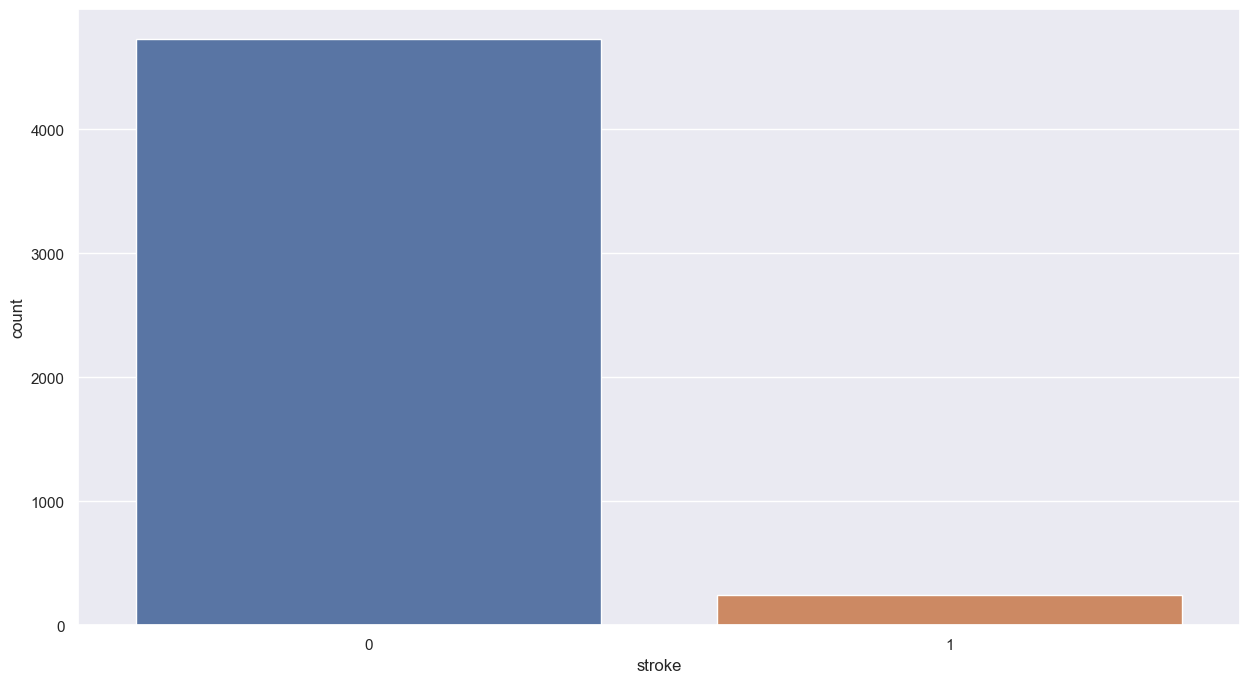

In [11]:
ax = sns.countplot(x=target,data=df)
print(df[target].value_counts())

Temos um Oversampling no Dataset, precisamos equializar os dados.

In [12]:
percentage_no_stroke = 100*(4733/float(df.shape[0]))
percentage_no_stroke

95.0210801043967

In [13]:
percentage_yes_stroke = 100*(248/float(df.shape[0]))
percentage_yes_stroke

4.978919895603292

In [14]:
import seaborn as sns
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

1    4733
0    4733
Name: stroke, dtype: int64


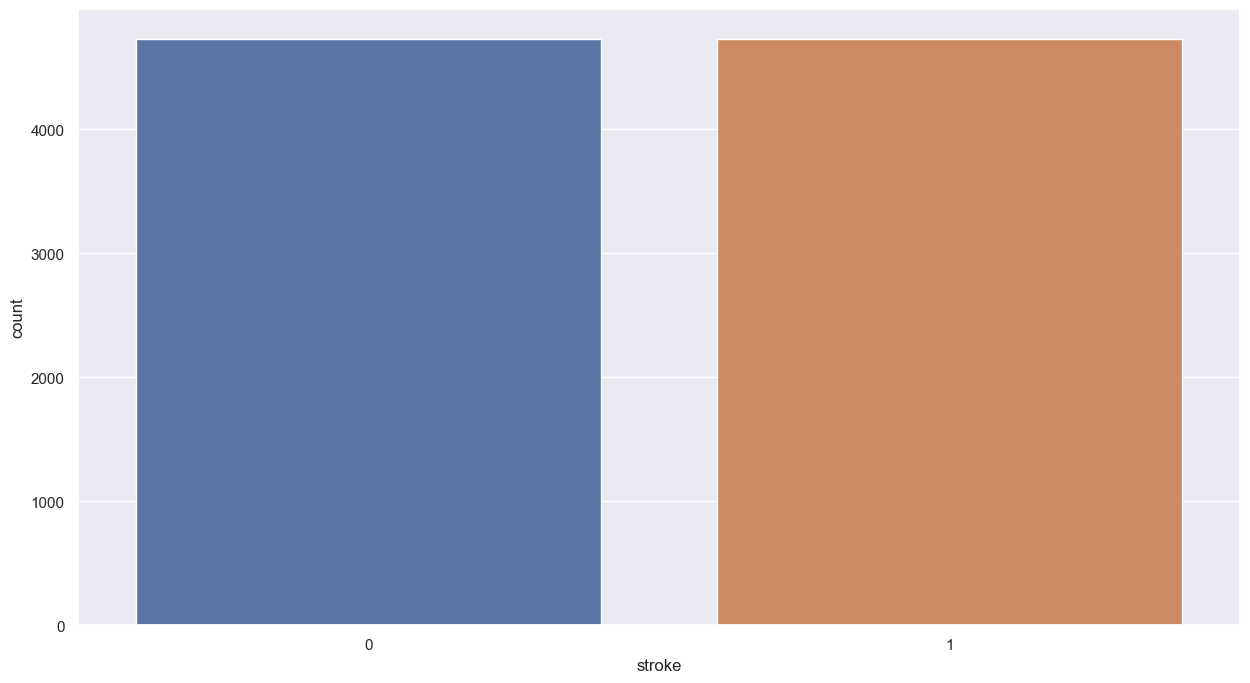

In [15]:
ax = sns.countplot(x=target,data=y)
print(y[target].value_counts())

In [16]:
df.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0,1,228.69,36.6,1.0,1
1,1.0,80.0,0,1,105.92,32.5,2.0,1
2,0.0,49.0,0,0,171.23,34.4,3.0,1
3,0.0,79.0,1,0,174.12,24.0,2.0,1
4,1.0,81.0,0,0,186.21,29.0,1.0,1


In [17]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   float64
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   avg_glucose_level  4981 non-null   float64
 5   bmi                4981 non-null   float64
 6   smoking_status     4981 non-null   float64
 7   stroke             4981 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 311.4 KB


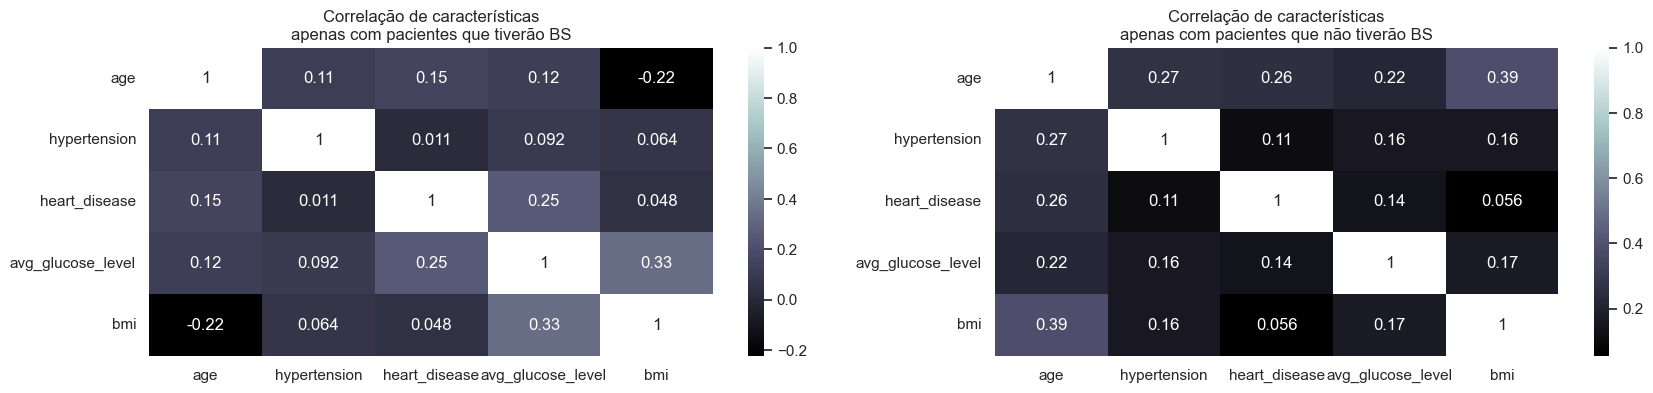

In [18]:
#buscando correlações
plt.figure(figsize=(20,4))
plt.subplot(121)
df_Y = df.loc[df['stroke']==1]
Corr_1 = df_Y[['age','hypertension','heart_disease','avg_glucose_level','bmi']]
ax_1 = sns.heatmap(Corr_1.corr(), annot=True, cmap="bone") 
ax_1.set(title='Correlação de características\napenas com pacientes que tiverão BS')
plt.subplot(122)
df_N = df.loc[df['stroke']==0]
Corr_2 = df_N[['age','hypertension','heart_disease','avg_glucose_level','bmi']]
ax_2 = sns.heatmap(Corr_2.corr(), annot=True, cmap="bone") 
ax_2.set(title='Correlação de características\napenas com pacientes que não tiverão BS')
plt.show()

In [19]:
# Definição dos imputs e do nosso objetivo
from sklearn.model_selection import GridSearchCV,train_test_split 

# dividimos os valores em variaveis de treino e teste com estado randômico de 25 e a porcentagem de 80% para treino e 20% para teste
x_train, x_test,y_train,y_test = train_test_split(x,y,random_state=25, test_size=0.20)
x_train.shape , x_test.shape,y_train.shape,y_test.shape #apresentação do "corpo" de cada variavel, meio que uma descrição do formato dos dados contidos nessa variavel

((7572, 7), (1894, 7), (7572, 1), (1894, 1))

Criando a Random Forest

In [20]:
# Iniciando a floresta e treinando o modelo
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(random_state=0, n_jobs=-1)
clf.fit(x_train, y_train)


C:\Users\Gabriel.Marques\AppData\Local\Temp\ipykernel_3596\2039221131.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=0)

In [21]:
# printando os resultados de treino e teste 
print (clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

0.9998679344955098
0.9619852164730729


Modelo está overfitado, ou seja, o treino está "memorizando" os resultados  e com uma acurácia extremamente alta. Caracterizando o Overfiting

Ajustando parâmetros da Random Forest

In [22]:
# alocando varios parâmetros para buscar qual o melhor
param_grid = {
    'n_estimators': np.linspace(2100, 2300, 5, dtype = int),
    'max_depth': [170, 180, 190, 200, 210, 220],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [2, 3, 4, 5]
}

In [23]:
# Retreino da floresta
rf_grid = RandomForestClassifier(criterion = 'entropy', bootstrap = True, n_jobs=-1)
# Inicialização da floresta com os valores do param_gri encontrados anteriormente
grid_rf_search = GridSearchCV(estimator = rf_grid, param_grid = param_grid, 
                          cv = 5, n_jobs = 8, verbose = 2)
grid_rf_search.fit(x_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


In [ ]:
# Retornando os melhores parâmetros para serem utilizados.
best_rf_grid = grid_rf_search.best_estimator_
grid_rf_search.best_params_

: 

In [ ]:
# printando novamente os resultados obtidos na floresta com os melhores parâmetros.
print (grid_rf_search.scor  e(x_train, y_train))
print(grid_rf_search.score(x_test, y_test))

: 

In [ ]:
from sklearn.metrics import confusion_matrix
pred_list = [rf_grid]

for i in pred_list:
    print("Score : ",i.score(x_test,y_test))
    grid_rf_search = i.predict(x_test)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(i)
    plt.show()

: 

In [ ]:
# Fazendo uma previsão
# [gender,age,hypertension,heart_disease,glucose_level,bmi,smokes]
# gender = 1 male, 0 female
# age
# hypertension = 0 yes, 1 no
# heart_disease = 0 no, 1 yes
# glucose_leve
# bmi
# smokes = 1 formal, 2 never, 3 smokes e 4 unknow
row = [[1, 75, 0, 1, 154, 30, 1]]
y_trainhat = rf_random.predict(row)
print('Classificação: %d' % y_trainhat[0])
if(y_trainhat == 0):
    print('Classificação: Paciente não teve Derrame')
if(y_trainhat == 1):
    print('Classificação: Paciente teve Derrame')

: 